[jupyter notebook](oop-class-model-factory-pattern.ipynb)

# Create objects by factory method pattern

### Model abstract base class and the derived classes

In [1]:
from abc import ABC, abstractmethod
import numpy as np
import random
from scipy.optimize import curve_fit

####################
# Abstract Base Class
class ModelABC( ABC ):
    
    def __init__( self ):        
        self.__pList = [ 5, 5, 5 ]         # Initial guess
        
    def GetParameters( self ):
        return self.__pList
    
    @abstractmethod
    def Func( self, x, a, b, c ):
        pass

    def GetFit( self, xData, yData ):

        # Fit data
        self.__pList, pcov = curve_fit( self.Func, xData, yData, p0 = self.__pList )
        yFit = [ self.Func( x, self.__pList[ 0 ], self.__pList[ 1 ], self.__pList[ 2 ] ) for x in xData ]

        return yFit

####################
# Derived class with log function
class ModelLog( ModelABC ):
        
    def Func( self, x, a, b, c ):
        return a + b * np.log10( c + x )

####################
# Derived class with polynomial function
class ModelPolynomial( ModelABC ):
        
    def Func( self, x, a, b, c ):
        return a + b * x + c * x ** 3

### Factory class

In [2]:
class ModelFactory:
    def GetModel( self, modelName ):
        if modelName == 'Polynomial':
            return ModelPolynomial()
        elif modelName == 'Log':
            return ModelLog()
        else:
            return None

### Use model to fit to data 

In [3]:
xData = [ i for i in range( 1, 20 ) ]

# Generate yData
random.seed( 59 )
yData = [ 3 + 2 * np.log10( 4 + x ) + random.uniform( -0.01, 0.01 ) for x in xData ]

# Create model object by factory object
modelFactory = ModelFactory()
model = modelFactory.GetModel( 'Polynomial' )
    
yFit = model.GetFit( xData, yData )
pList = model.GetParameters()

print( 'a = ', pList[ 0 ] )
print( 'b = ', pList[ 1 ] )
print( 'c = ', pList[ 2 ] )

a =  4.38099670343307
b =  0.09986977154109403
c =  -8.575473383750623e-05


### Plot data and fit

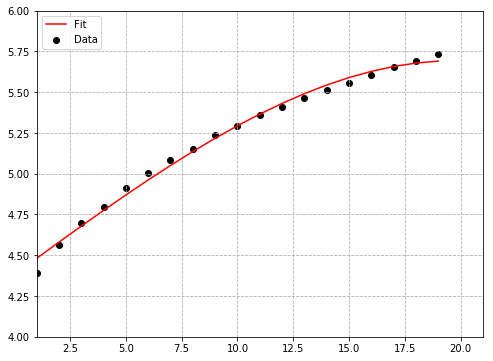

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure( figsize = ( 8, 6 ) )
plt.scatter( xData, yData, color = 'black', label = 'Data' )
plt.plot( xData, yFit, color = 'red', label = 'Fit' )
plt.grid( linestyle = '--')
plt.xlim( 1, 21 )
plt.ylim( 4, 6 )
plt.legend( loc = 'upper left' )
plt.show()